# Image Classification - Quick Start

:label:`sec_imgquick`


We adopt the task of Image Classification as a running example to illustrate basic usage of AutoGluon’s main APIs. This task involves a few steps which we demonstrate how to get started with AutoGluon. 

In this tutorial, we will load images and the corresponding labels into AutoGluon and use this data to obtain a neural network that can classify new images. Different from traditional machine learning where we need to manually define the neural network, and specify the hyperparameters in the training process, with just a single call to `AutoGluon`'s `fit` function, AutoGluon will automatically train many models with different hyperparameter configurations and return the best model.

We begin by specifying `image_classification` as our task of interest:

In [1]:
import autogluon as ag
from autogluon import ImageClassification as task

## Create AutoGluon Dataset

Our image classification task is based on a subset of the [Shopee-IET dataset](https://www.kaggle.com/c/shopee-iet-machine-learning-competition/data) from Kaggle. Each image in this data depicts a clothing item and the corresponding label specifies its clothing category.
Our subset of the data contains the following possible labels: `BabyPants`, `BabyShirt`, `womencasualshoes`, `womenchiffontop`.

We download the data subset and unzip it via the following commands:

In [2]:
filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
ag.unzip(filename)

Once the dataset resides on our machine, we load it into AutoGluon `Dataset`. Both image folder format and RecordIO format are supported. An example of image folder dataset format is illustrated here:
```
    train/
    ├── class1/
        ├── img1.jpg
        ├── ...
    ├── class2/
    ├── ...
```

In [3]:
dataset = task.Dataset('data/train')

## Use AutoGluon to Fit Models

Now, we want to fit a classifier using AutoGluon:

In [4]:
classifier = task.fit(dataset,
                      epochs=10,
                      ngpus_per_trial=1,
                      verbose=True)

INFO:autogluon.task.image_classification.pipeline:{'dataset': Dataset ImageFolderDataset
    Number of datapoints: 800
    Root location: data/train, 'net': 'ResNet18_v1b', 'optimizer': <autogluon.core.optimizer.SGD object at 0x7fc7acda01d0>, 'lr_scheduler': 'cosine', 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'metric': 'accuracy', 'num_gpus': 1, 'split_ratio': 0.8, 'batch_size': 64, 'input_size': 224, 'epochs': 10, 'verbose': True, 'num_workers': 4, 'hybridize': True, 'final_fit': False, 'task_id': 0}


INFO:autogluon.task.image_classification.pipeline:{'dataset': Dataset ImageFolderDataset
    Number of datapoints: 800
    Root location: data/train, 'net': 'ResNet18_v1b', 'optimizer': <autogluon.core.optimizer.SGD object at 0x7fc7acb3d210>, 'lr_scheduler': 'cosine', 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'metric': 'accuracy', 'num_gpus': 1, 'split_ratio': 0.8, 'batch_size': 64, 'input_size': 224, 'epochs': 10, 'verbose': True, 'num_workers': 4, 'hybridize': True, 'final_fit': False, 'task_id': 1}


INFO:autogluon.task.image_classification.pipeline:{'dataset': Dataset ImageFolderDataset
    Number of datapoints: 800
    Root location: data/train, 'net': 'ResNet18_v1b', 'optimizer': <autogluon.core.optimizer.SGD object at 0x7fc7ac97f650>, 'lr_scheduler': 'cosine', 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'metric': 'accuracy', 'num_gpus': 1, 'split_ratio': 0.8, 'batch_size': 64, 'input_size': 224, 'epochs': 10, 'verbose': True, 'num_workers': 4, 'hybridize': True, 'final_fit': True, 'task_id': 2}


Within `fit`, the dataset is automatically splited into training and validation sets.
The model with the best hyperparameter configuration is selected based on its performance on validation set.
The best model is finally retrained on our entire dataset (ie. merging training+validation) using the best configuration.

The best Top-1 accuracy achieved on the validation set is:

In [5]:
print('Top-1 val acc: %.3f' % classifier.results['best_reward'])

Top-1 val acc: 0.706


## Predict on A New Image

Given an example image, we can easily use the final model to `predict` the label (and the conditional class-probability):

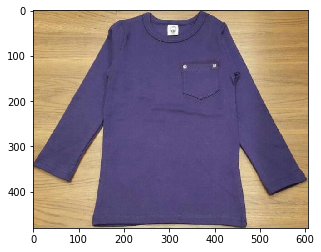

The input picture is classified as [BabyShirt], with probability 0.70.


In [6]:
image = 'data/test/BabyShirt/BabyShirt_323.jpg'
ind, prob = classifier.predict(image)

print('The input picture is classified as [%s], with probability %.2f.' %
      (dataset.init().classes[ind.asscalar()], prob.asscalar()))

## Evaluate on Test Dataset

We now evaluate the classifier on a test dataset:

Load the test dataset:

In [7]:
test_dataset = task.Dataset('data/test', train=False)

The validation and test top-1 accuracy are:

In [8]:
test_acc = classifier.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc)


Top-1 test acc: 0.906


Finish and exit:

In [9]:
ag.done()